# Import Dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score


# Get Dataset

Data acquired from https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination?resource=download

In [ ]:
# Clone Github
!git clone https://github.com/dunasi4139/dataset.git

fatal: destination path 'dataset' already exists and is not an empty directory.


In [ ]:
!ls

dataset
deepnote_exports
indonesia-tourism-destination.xlsx
init.ipynb
Project_Akhir_Visualisasi_Data_Kelompok_8.ipynb


In [ ]:
df = pd.read_csv("dataset/tourism_with_id.csv")

In [ ]:
df.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


### Data Cleaning

In [ ]:
df.drop(['Unnamed: 11', 'Unnamed: 12'], axis=1, inplace=True)

Melakukan transformasi data pada kolom Time_Minutes dengan menggunakan nilai rata-rata pada objek wisata per masing-masing kota

In [ ]:
df['Time_Minutes'] = round(df['Time_Minutes'].fillna(df.groupby(df['City'])['Time_Minutes'].transform('mean')))

Merubah nilai 0 pada kolom price menjadi NaN untuk mempermudah proses transformasi

In [ ]:
df['Price'] = df['Price'].replace(0, np.NaN)

Melakukan transformasi data pada kolom Price dengan menggunakan nilai rata-rata harga berdasarkan Kota

In [ ]:
df['Price'] = round(df['Price'].fillna(df.groupby([df['City']])['Price'].transform('mean')))

In [ ]:
df['Price'].isna().sum()

0

Berdasarkan info dibawah dapat kita simpulkan bahwa data telah bersih dan tidak ada nilai NaN atau Null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    float64
 6   Rating        437 non-null    float64
 7   Time_Minutes  437 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 37.7+ KB


In [ ]:
df.shape

(437, 11)

Memeriksa duplikat data

In [ ]:
df.duplicated().sum()

0

# Exploratory Data Analysis

## Perbandingan Rata-Rata Rating Berdasarkan Kota

In [ ]:
                                                                                        rating_per_city = df.loc[:, ['City', 'Rating']].groupby('City', as_index=False).mean().sort_values(by='Rating', ascending=False, ignore_index=True)
print(rating_per_city)

         City    Rating
0     Jakarta  4.488095
1  Yogyakarta  4.466667
2    Surabaya  4.454348
3     Bandung  4.420968
4    Semarang  4.361404


(4.0, 4.6)

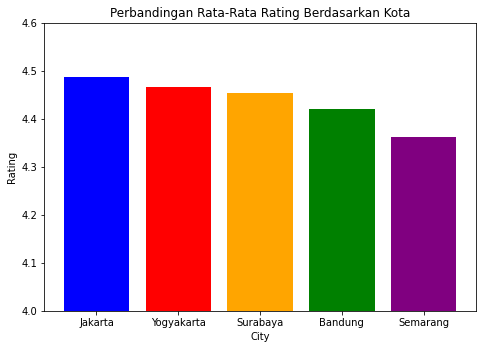

In [ ]:
city = rating_per_city['City']
rating = rating_per_city['Rating']
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(city, rating, color=['blue','red', 'orange', 'green', 'purple'])
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Perbandingan Rata-Rata Rating Berdasarkan Kota')
plt.ylim((4, 4.6))

Berdasarkan hasil visualisasi dapat dilihat bahwa rata-rata rating tertinggi terdapat pada kota Jakarta sebesar 4,48 dan terendah didapat kota semarang sebesar 4,36.  Perbedaan rata-rata rating antar kota tidak terlalu signifikan sehingga dapat disimpulkan bahwa pada masing-masing kota banyak objek wisata yang mendapat rating yang bagus secara merata.

## Hubungan Antara Rating dan Rata-rata Harga

<Figure size 432x288 with 0 Axes>

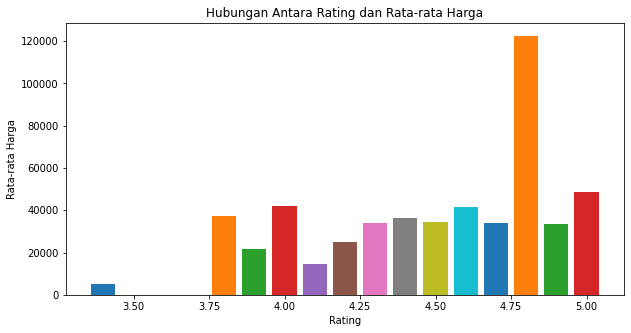

In [ ]:
get_rating_price =  round(df.groupby(df['Rating'])['Price'].mean())
df1 = get_rating_price.reset_index(name = 'Price')
rating = list(df1['Rating'])
price = list(df1['Price'])
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
cmap = plt.cm.tab10
colors = cmap(np.arange(len(rating)) % cmap.N)
plt.bar(rating, price, color=colors, width=0.08)
plt.xlabel("Rating")
plt.ylabel("Rata-rata Harga")
plt.title("Hubungan Antara Rating dan Rata-rata Harga")
# plt.ylim(1000.0, 125000.0)
plt.show()



In [ ]:
print(df1)

    Rating     Price
0      3.4    5000.0
1      3.8   37500.0
2      3.9   21853.0
3      4.0   42219.0
4      4.1   14409.0
5      4.2   24784.0
6      4.3   33833.0
7      4.4   36394.0
8      4.5   34288.0
9      4.6   41641.0
10     4.7   34084.0
11     4.8  122422.0
12     4.9   33548.0
13     5.0   48588.0


Berdasarkan hasil visualisasi diatas harga tidak terlalu mempengaruhi rating. Tempat wisata yang mendapat rating 4.5 keatas harga tiket masuknya rata-rata dari angka 35000 sampai 123000. Objek wisata tersebut kemungkinan meningkatkan kualitas pelayanan yang sebanding dengan harga yang ditetapkan

## Perbandingan Jumlah Berdasarkan Kategori Objek  Wisata

Text(0.5, 1.0, 'Perbandingan Jumlah Berdasarkan Kategori Objek Wisata')

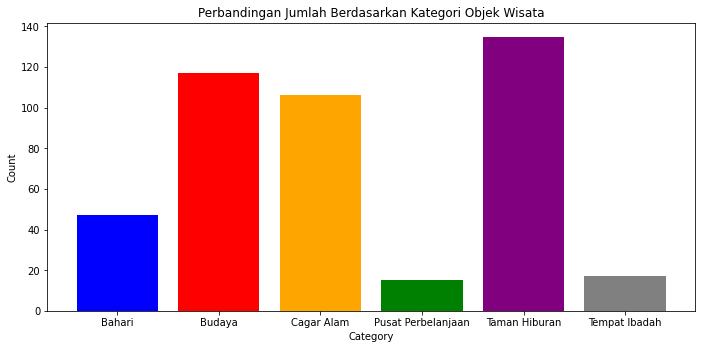

In [ ]:
category = df.groupby('Category')['Category'].count()
df2 = category.reset_index(name = 'Count')
fig = plt.figure()
ax = fig.add_axes([1,1,1.5,1])
ax.bar(df2['Category'],df2['Count'], color=['blue','red', 'orange', 'green', 'purple', 'grey'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Perbandingan Jumlah Berdasarkan Kategori Objek Wisata')

## Perbandingan Jumlah Berdasarkan Kategori Objek Wisata

In [ ]:
print(df2)

             Category  Count
0              Bahari     47
1              Budaya    117
2          Cagar Alam    106
3  Pusat Perbelanjaan     15
4       Taman Hiburan    135
5       Tempat Ibadah     17


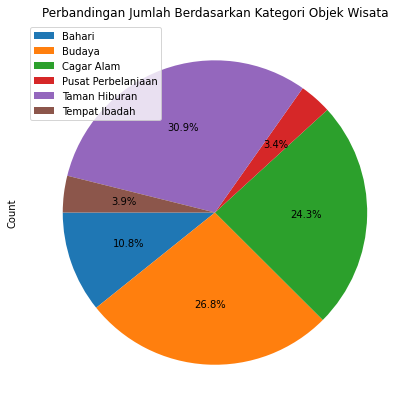

In [ ]:
df2['Count'].plot(kind='pie', autopct='%1.1f%%', startangle=180, figsize =(14, 7), labels=None)
plt.legend(df2['Category'])
plt.title('Perbandingan Jumlah Berdasarkan Kategori Objek Wisata')
plt.show()

Pada dataset yang digunakan terdapat 6 kategori objek wisata yaitu Budaya, Taman Hiburan, Cagar Alam, Bahari, Pusat Perbelanjaan, Tempat Ibadah. Dilihat dari presentase jumlah objek wisata Taman Hiburan yang paling banyak yaitu 135 (30.9%) dari seluruh data. Yang paling sedikit yaitu kategori Tempat Ibadah sebanyak 17(3.9%) dan Pusat Perbelanjaan sebanyak 15(3.4%)

## Perbandingan Objek Wisata dari Rating (4.8 sampai 5.0) Berdasarkan Harga

Mengambil Objek wisata yang memiliki Rating 4.7 - 5.0 diambil sebanyak 18 data

In [ ]:
df3 = df.sort_values('Rating', ascending =False).iloc[1:1+18][['Rating','Place_Name','Category','Price', 'Time_Minutes']]

Mencari Objek wisata dari rating 4.7-5.0 dengan harga yang terjangkau/rendah. Data yang diambil sebanyak 10 objek wisata.

In [ ]:
df4 = df3.sort_values('Price', ascending =True).iloc[1:1+10][['Rating','Place_Name','Category','Price', 'Time_Minutes']]

Mencari Objek wisata dengan Rating tinggi, harga terjangkau dan waktu tempuh yang singkat. Data yang diambil sebanyak 5 Objek Wisata

In [ ]:
df5 = df4.sort_values('Time_Minutes', ascending =True).iloc[1:1+5][['Rating','Place_Name','Category','Price', 'Time_Minutes']]

Objek diurutkan berdasarkan Rating rendah-tinggi agar memudahkan dalam mengamati

In [ ]:
df5 = df5.sort_values('Rating', ascending =True)

Text(0.5, 1.0, 'Perbandingan Objek Wisata dari Rating (4.8 sampai 5.0) Berdasarkan Harga')

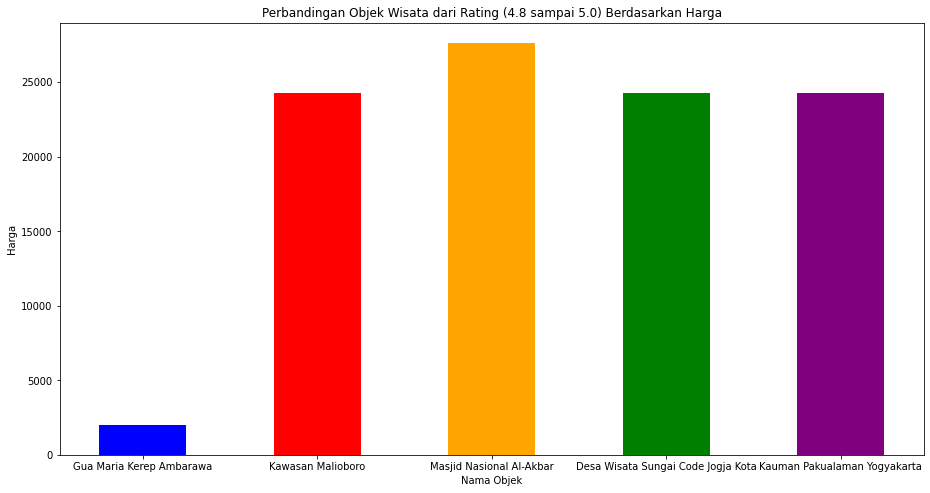

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,2,2,1.5])
ax.bar(df5['Place_Name'],df5['Price'], color=['blue','red', 'orange', 'green', 'purple'], width=0.5)
plt.xlabel('Nama Objek')
plt.ylabel('Harga')
plt.title('Perbandingan Objek Wisata dari Rating (4.8 sampai 5.0) Berdasarkan Harga')

Pada visualisasi diatas dapat diamati bahwa terdapat 5 Objek Wisata yang telah difilter berdasarkan Rating, Harga dan Waktu tempuh yang paling tertinggi/ mudah dijangkau oleh pengunjung. Urutan datanya telah disesuaikan berdasarkan dari rating terendah-tertinggi yaitu Gua Maria Kerep Ambarawa, Kawasan Malioboro, Masjid Nasional Al-Akbar, Desa Wisata Sungai Code Jogja Kota, Kauman Pakualaman Yogjakarta. Berdasarkan harganya yang paling terjangkau yaitu Gua Maria Kerep Ambarawa(Rp. 2000) dan yang paling mahal yaitu Masjid Nasional Al-Akbar (Rp. 27500).

## Perbandingan Jumlah 5 Rating Tertinggi dengan Waffle Chart

In [ ]:
df_rating = df['Rating'].value_counts()
df_rating = df_rating.rename_axis('rating').reset_index(name='counts')
df_rating.set_index('rating', inplace = True)

In [ ]:
def create_waffle_chart(kategori, nilai, height, width, colormap, value_sign=''):

    total_nilai = sum(nilai)
    proporsi_kategori = [(value/ total_nilai) for value in nilai]

    total_num_tiles = width * height
    print ('Total number of tiles is', total_num_tiles)

    tiles_per_category = [round(proportion * total_num_tiles) for proportion in proporsi_kategori]

    for i, tiles in enumerate(tiles_per_category):
        print (df_rating.index.values[i] + ': ' + str(tiles))

    waffle_chart = np.zeros((height, width))

    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1

            waffle_chart[row, col] = category_index

    fig = plt.figure()

    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    ax = plt.gca()

    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    values_cumsum = np.cumsum(nilai)
    total_values = values_cumsum[len(values_cumsum) - 1]

    legend_handles = []
    for i, category in enumerate(kategori):
        if value_sign == '%':
            label_str = category + ' (' + str(nilai[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(nilai[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(kategori),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [ ]:
df_rating

,counts
rating,
4.4,98
4.5,98
4.6,75
4.3,47
4.7,37
4.2,20
4.1,20
4.0,18
4.8,10


In [ ]:
df_rating.index = df_rating.index.map(str)

In [ ]:
df_rating_sort = df_rating.sort_index()
df_rating_top5 = df_rating_sort.tail(5)
df_rating_top5

,counts
rating,
4.6,75
4.7,37
4.8,10
4.9,4
5.0,4


In [ ]:
width = 100
height = 30

kategori = df_rating_top5.index.values
nilai = df_rating_top5['counts']
# df_rating.index = df_rating.index.map(str)

colormap = plt.cm.coolwarm

Total number of tiles is 3000
4.4: 1731
4.5: 854
4.6: 231
4.3: 92
4.7: 92


<Figure size 432x288 with 0 Axes>

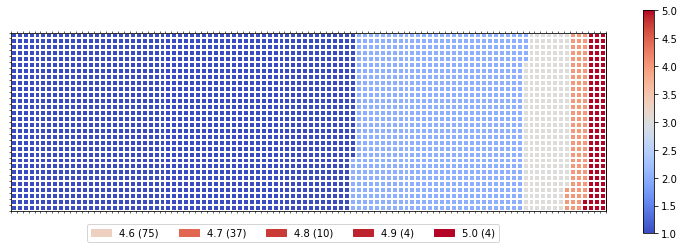

In [ ]:
create_waffle_chart(kategori, nilai, height, width, colormap)

pada visualisasi diatas berisikan informasi proporsi setiap rating. Rating yang memiliki jumlah tertinggi adalah 4.6 sebanyak 75. Rating yang memiliki jumlah terkecil adalah rating 4.9 dan 5 sebanyak 4 objek wisata

## Perbandingan Jumlah Semua Rating dengan Regression Plot

In [ ]:
df_rp = pd.DataFrame(df['Rating'].value_counts())
df_rp.index = map(float, df_rp.index)
df_rp.reset_index(inplace=True)
df_rp.columns = ['rating', 'total']

In [ ]:
df_rp.head()

,rating,total
0,4.4,98
1,4.5,98
2,4.6,75
3,4.3,47
4,4.7,37


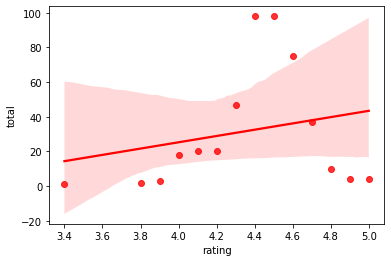

In [ ]:
ax = sns.regplot(x='rating', y='total', data=df_rp, color='red')

# Machine Learning

## Preprocessing

In [ ]:
data = df.copy()
data.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000.0,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,72904.0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000.0,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000.0,4.5,99.0,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000.0,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


Menghapus kolom yang tidak digunakan dalam proses machine learning. Disini kita menghapus 6 kolom yaitu Place_Id,&nbsp;Place_Name,&nbsp;Description, Coordinate, Lat, Long

In [ ]:
data.drop(['Place_Id', 'Place_Name', 'Description','Coordinate','Lat','Long'], axis=1, inplace=True)

Kolom yang digunakan dalam proses machine learning yaitu Category, City, Price, Rating, Time_Minutes

In [ ]:
data

,Category,City,Price,Rating,Time_Minutes
0,Budaya,Jakarta,20000.0,4.6,15.0
1,Budaya,Jakarta,72904.0,4.6,90.0
2,Taman Hiburan,Jakarta,270000.0,4.6,360.0
3,Taman Hiburan,Jakarta,10000.0,4.5,99.0
4,Taman Hiburan,Jakarta,94000.0,4.5,60.0
...,...,...,...,...,...
432,Budaya,Surabaya,2000.0,4.4,45.0
433,Taman Hiburan,Surabaya,27588.0,4.6,52.0
434,Taman Hiburan,Surabaya,27588.0,4.4,45.0
435,Taman Hiburan,Surabaya,27588.0,4.6,52.0


Pada proses machine learning kita harus melakukan transformasi atau perubahan bentuk data menjadi numeric, kolom yang akan ditransform Category dan City. Pada Category sendiri terdapat 6 Kategori yaitu Budaya (1), Taman Hiburan (2), Cagar Alam (3), Bahari (4), Pusat Perbelanjaan (5), Tempat Ibadah (6).

In [ ]:
data['Category'] = data['Category'].replace('Budaya', 1)
data['Category'] = data['Category'].replace('Taman Hiburan', 2)
data['Category'] = data['Category'].replace('Cagar Alam', 3)
data['Category'] = data['Category'].replace('Bahari', 4)
data['Category'] = data['Category'].replace('Pusat Perbelanjaan', 5)
data['Category'] = data['Category'].replace('Tempat Ibadah', 6)

Pada kolom City sendiri terdiri dari 5 Kota yaitu Jakarta (1), Yogyakarta (2), Bandung (3), Semarang (4) dan Surabaya (5)

In [ ]:
data['City'] = data['City'].replace('Jakarta', 1)
data['City'] = data['City'].replace('Yogyakarta', 2)
data['City'] = data['City'].replace('Bandung', 3)
data['City'] = data['City'].replace('Semarang', 4)
data['City'] = data['City'].replace('Surabaya', 5)

In [ ]:
data_copy = data.copy()

In [ ]:
data.head()

,Category,City,Price,Rating,Time_Minutes
0,1,1,20000.0,4.6,15.0
1,1,1,72904.0,4.6,90.0
2,2,1,270000.0,4.6,360.0
3,2,1,10000.0,4.5,99.0
4,2,1,94000.0,4.5,60.0


## Clustering K-Means

In [ ]:
ms = MinMaxScaler()
feature_mms = ms.fit_transform(data)

In [ ]:
data = pd.DataFrame(feature_mms, columns=['Category', 'City', 'Price', 'Rating', 'Time_Minutes'])

In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(feature_mms)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3,
       0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0,
       3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
data['cluster'] = kmeans.labels_

In [ ]:
data.head()

,Category,City,Price,Rating,Time_Minutes,cluster
0,0.0,0.0,0.021135,0.7500,0.014286,0
1,0.0,0.0,0.079982,0.7500,0.228571,0
2,0.2,0.0,0.299221,0.7500,1.000000,0
3,0.2,0.0,0.010011,0.6875,0.254286,0
4,0.2,0.0,0.103448,0.6875,0.142857,0


In [ ]:
data_copy['cluster'] = kmeans.labels_

In [ ]:
data_copy

,Category,City,Price,Rating,Time_Minutes,cluster
0,1,1,20000.0,4.6,15.0,0
1,1,1,72904.0,4.6,90.0,0
2,2,1,270000.0,4.6,360.0,0
3,2,1,10000.0,4.5,99.0,0
4,2,1,94000.0,4.5,60.0,0
...,...,...,...,...,...,...
432,1,5,2000.0,4.4,45.0,1
433,2,5,27588.0,4.6,52.0,1
434,2,5,27588.0,4.4,45.0,1
435,2,5,27588.0,4.6,52.0,1


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


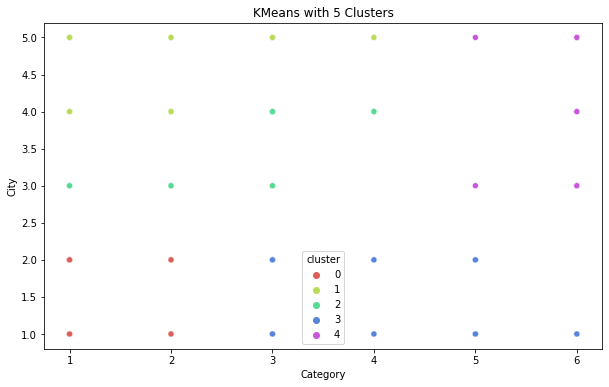

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data_copy['Category'], data_copy['City'], hue=data_copy['cluster'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


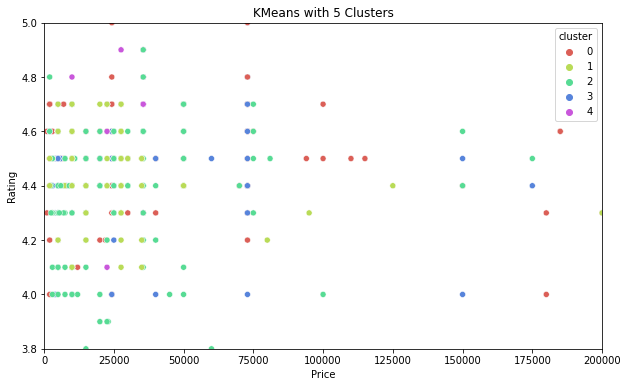

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data_copy['Price'], data_copy['Rating'], hue=data_copy['cluster'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.xlim((0, 200000))
plt.ylim((3.8, 5))
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


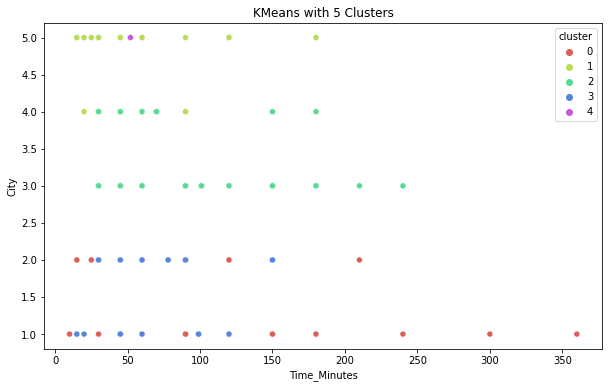

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data_copy['Time_Minutes'], data_copy['City'], hue=data_copy['cluster'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

Dalam Proses Clustering didapatkan 5 Cluster yaitu Cluster 0,1,2,3, dan 4.  

Cluster 0 City nya adalah Bandung, Semarang dengan Category  Budaya, Taman Hiburan, Cagar Alam, Bahari yang Price nya 0k sampai 75k dan Rating= 3.8 sampai 4,8 serta Time Minutes antara 50 sampai 200.

Cluster 1 City nya adalah Jakarta dan Yogyakarta dengan Category  Cagar Alam, Bahari, Pusat Perbelanjaan yang Price nya 25k sampai 75k dan Rating= 4.0 sampai 4,7 serta Time Minutes antara 25 sampai 200.

Cluster 2 City nya adalah Semarang, Surabaya dengan Category  Budaya, Taman Hiburan, Cagar Alam, Bahari yang Price nya 0k sampai 50k dan Rating= 4.1 sampai 4,7 serta Time Minutes antara 25 sampai 200.


Cluster 3 City nya adalah Jakarta dan Yogyakarta dengan Category  Cagar Alam, Bahari, Pusat Pembelanjaan yang Price nya 25k sampai 75k dan Rating= 4.0 sampai 4,7 serta Time Minutes antara 25 sampai 150.

Cluster 4 City nya adalah Semarang, Surabaya dengan Category  Pusat Perbelanjaan, Tempat Ibadah yang Price nya 0k sampai 40k dan Rating= 4.1 sampai 4,9 serta Time Minutes antara 0 sampai 50.


## Menyiapkan data

Membagi data latih dan data uji

In [ ]:
data_latih, data_uji = train_test_split(data, test_size=0.2)

In [ ]:
print(data_latih.shape[0])
print(data_uji.shape[0])

349
88


In [ ]:
label_uji = data_uji.pop('cluster')

## Mencari Hyperparameter

* Melakukan Train-Test Split (Misal 80% Training Data - 20% Testing Data)
* Gunakan Training data untuk membuat k-Fold
  * Disarankan 5-cross fold Validation
  * Jika data > 1000 baris bisa menggunakan 10-cross validation
  * Nilai parameter terbaik ditentukan dari nilai rata-rata n-fold
* Training kembali 80% training data dengan menggunakan hyperparam terbaik yang didapatkan dari tahapan sebelumnya
* Ujikan model dengan 20% testing data


Menggunakan&nbsp;Grid&nbsp;Search&nbsp;CV&nbsp;untuk&nbsp;melakukan&nbsp;cross&nbsp;validation&nbsp;dan&nbsp;mencari&nbsp;Hyperparameter&nbsp;terbaik

In [ ]:
grid_models = [(GaussianNB(),[{'var_smoothing': [1e-09]}]),
               (KNeighborsClassifier(), [{'n_neighbors': [3,5,7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}])
               ]

In [ ]:
n_column = len(data_latih.columns)-1
data_latih_array = data_latih.values
X = data_latih_array[:, 0:n_column] #data
y = data_latih_array[:, n_column] #label
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=5, verbose=2)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Hyperparameter terbaik : ',best_param)
    print('')
    print('----------------')
    print('')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
GaussianNB():
Best Accuracy : 95.34%
Hyperparameter terbaik :  {'var_smoothing': 1e-09}

----------------

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3,

## Training menggunakan 2 Model

### Naive Bayes Gaussian

In [ ]:
NBclassifier = GaussianNB(var_smoothing= 1e-09)
NBclassifier.fit(X_train, y_train)
y_predNB = NBclassifier.predict(X_validation)

In [ ]:
cm_NB = confusion_matrix(y_validation, y_predNB)
print(classification_report(y_validation, y_predNB))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        26
         1.0       0.75      1.00      0.86         9
         2.0       1.00      0.86      0.92        21
         3.0       1.00      0.83      0.91        12
         4.0       1.00      1.00      1.00         2

    accuracy                           0.93        70
   macro avg       0.94      0.94      0.93        70
weighted avg       0.94      0.93      0.93        70



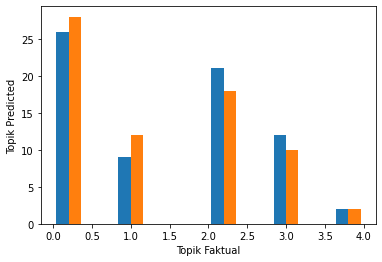

In [ ]:
plt.hist((y_validation, y_predNB), bins=10)
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()

### KNN

In [ ]:
KNNclassifier = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance')
KNNclassifier.fit(X_train, y_train)
y_predKNN = KNNclassifier.predict(X_validation)

In [ ]:
cm_KNN = confusion_matrix(y_validation, y_predKNN)
print(classification_report(y_validation, y_predKNN))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        21
         3.0       1.00      1.00      1.00        12
         4.0       1.00      1.00      1.00         2

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



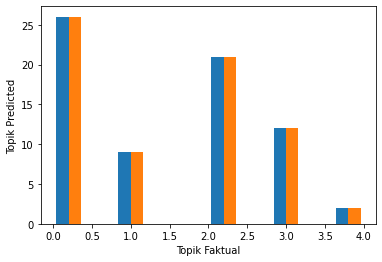

In [ ]:
plt.hist((y_validation, y_predKNN), bins=10)
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()

## Testing menggunakan 2 Model

Memisahkan data uji dengan label uji

In [ ]:
n_column = len(data_latih.columns)-1
data_latih_array = data_latih.values
A = data_latih_array[:, 0:n_column] #data
b = data_latih_array[:, n_column] #label

### Naive Bayes Gaussian

In [ ]:
testing_y_predNB = NBclassifier.predict(A)

In [ ]:
print(classification_report(b, testing_y_predNB))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       102
         1.0       0.85      0.98      0.91        57
         2.0       0.98      0.90      0.94       115
         3.0       0.98      0.95      0.97        66
         4.0       1.00      0.89      0.94         9

    accuracy                           0.95       349
   macro avg       0.96      0.94      0.95       349
weighted avg       0.95      0.95      0.95       349



In [ ]:
akurasi_NB = accuracy_score(b, testing_y_predNB)*100
print(akurasi_NB)

95.12893982808023


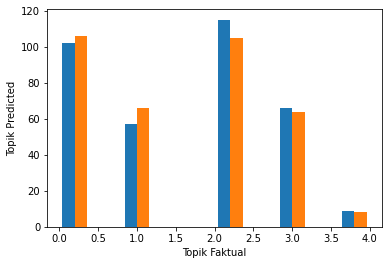

In [ ]:
plt.hist((b, testing_y_predNB), bins=10)
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()

### KNN

In [ ]:
testing_y_predKNN = KNNclassifier.predict(A)

In [ ]:
print(classification_report(b, testing_y_predKNN))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       102
         1.0       1.00      1.00      1.00        57
         2.0       1.00      1.00      1.00       115
         3.0       1.00      1.00      1.00        66
         4.0       1.00      1.00      1.00         9

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



In [ ]:
akurasi_KNN = accuracy_score(b, testing_y_predKNN)*100
print(akurasi_KNN)

100.0


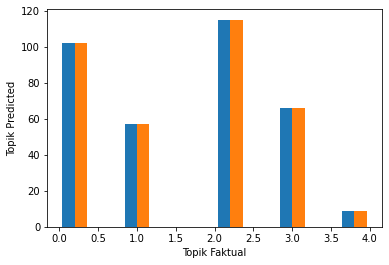

In [ ]:
plt.hist((b, testing_y_predKNN), bins=10)
plt.xlabel("Topik Faktual")
plt.ylabel("Topik Predicted")
plt.show()

## Perbandingan Hasil Uji Model Naive Bayes dan KNN

Text(0.5, 1.0, 'Perbandingan Hasil Akurasi Naive Bayes vs KNN')

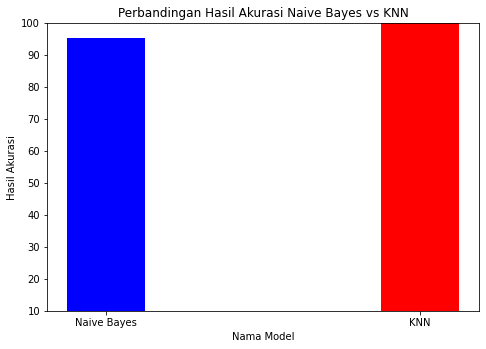

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
model_name = ['Naive Bayes', 'KNN']
akurasi = [akurasi_NB, akurasi_KNN]
ax.bar(model_name, akurasi, color=['blue','red'], width=0.25)
plt.xlabel('Nama Model')
plt.ylabel('Hasil Akurasi')
plt.ylim(10, 100)
plt.title('Perbandingan Hasil Akurasi Naive Bayes vs KNN')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a1e9023f-0fb6-4275-a3b6-3206b6dfe3fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>